In [1]:
import pandas as pd
import scipy.stats as stats

mar_bir = pd.read_csv('dataset_sample/data.csv')

In [2]:
mar_bir.head()

,id,sq1,sq2,sq3,q1_1,q1_2_1,q1_2_2,q1_3,q1_4,q1_5,...,sq4,sq5,sq6,sq6_a,sq7,sq8,sq9,sq10,sq11,sq12
0,1,1,9,27,1,2018,10,3,2,2,...,4,2,5,,5,6,2,3,5,5
1,2,1,9,44,1,2005,2,3,2,2,...,6,2,4,,4,6,1,5,5,3
2,3,2,9,39,1,2004,10,3,2,2,...,5,2,3,,4,5,1,4,6,3
3,4,2,9,44,1,2005,5,3,2,2,...,6,2,3,,4,4,1,4,6,4
4,5,2,9,40,1,2010,5,3,2,2,...,5,2,-1,,-1,-1,1,1,5,4


In [3]:
#경제수준과 결혼만족도 p value
x = mar_bir.sq11.values
y = mar_bir.q1_6.values
stats.pearsonr(x,y)

(0.051569241607082525, 0.249730947554984)

In [4]:
#결혼만족도가 높을수록 자녀 부부관계 강화시킨다고 인식함
x= mar_bir.q1_6.values
y= mar_bir.q1_13_2.values 
stats.pearsonr(x, y)

(0.18207147641182755, 4.2156368246257165e-05)

In [5]:
# 현 직장이 육아를 병행하기 좋을수록, 희망자녀수 감소함(!!!)
x= mar_bir.q2_5.values 
y= mar_bir.q1_10.values 
stats.pearsonr(x, y)

(-0.09851957556419058, 0.027607986961315514)

In [6]:
# 행복할수록 희망자녀수 늘어남
x= mar_bir.q3_2.values 
y= mar_bir.q1_10.values 
stats.pearsonr(x, y)

(0.10474672454730896, 0.019139964352061455)

In [7]:
# 가구소득과 희망자녀수 상관관계 없다 p>0.05
x= mar_bir.sq11.values
y= mar_bir.q1_10.values 
stats.pearsonr(x, y)

(0.019098476511547665, 0.6700896957002201)

In [8]:
# 소득- 학력 정적인 상관관계 있다
x= mar_bir.sq11.values 
y= mar_bir.sq4.values 
stats.pearsonr(x, y)

(0.20303204368106992, 4.732247908330736e-06)

In [9]:
# 소득이 높을수록 행복하다고 생각함
x= mar_bir.sq11.values 
y= mar_bir.q3_2.values 
stats.pearsonr(x, y)

(0.1324760842084619, 0.0029981031547043563)

/Users/j-max/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sq11', ylabel='q3_2'>

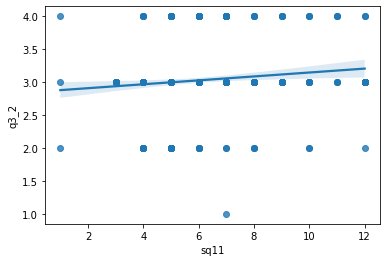

In [10]:
# 소득과 행복 scatterplot
import seaborn as sns
sns.regplot(mar_bir['sq11'], mar_bir['q3_2'], fit_reg=True)

/Users/j-max/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sq11', ylabel='q1_6'>

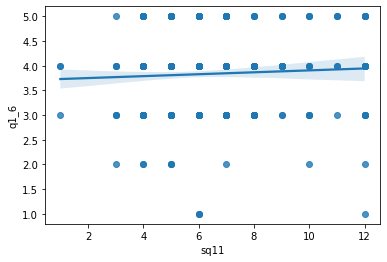

In [11]:
# 소득과 결혼만족도
sns.regplot(mar_bir['sq11'], mar_bir['q1_6'], fit_reg=True)

/Users/j-max/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sq12', ylabel='q1_6'>

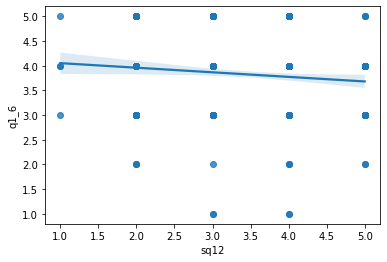

In [12]:
# 부모님의 경제수준과 결혼 만족도
sns.regplot(mar_bir['sq12'], mar_bir['q1_6'], fit_reg=True)

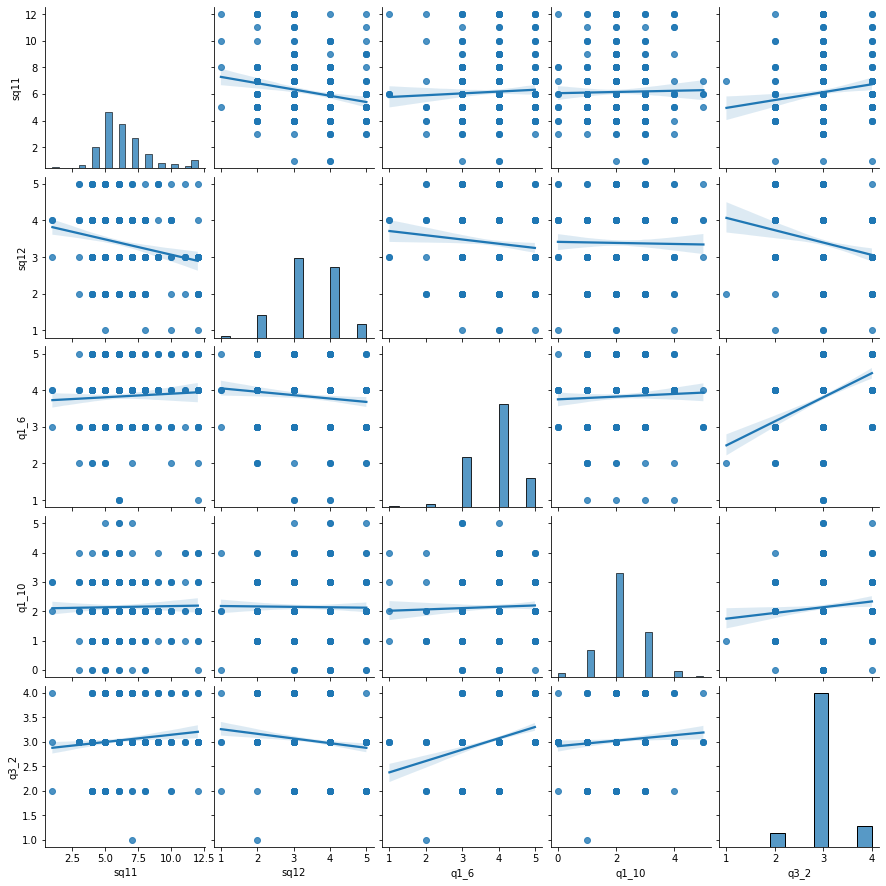

In [13]:
# pairplot 여러개의 변수 넣고 상관관계 그리기
# kind= 'reg' 추세선 포함하여 출력
sns.pairplot(mar_bir[['sq11', 'sq12', 'q1_6', 'q1_10', 'q3_2']],
kind= 'reg')

In [14]:
df1= mar_bir[['sq11', 'sq12', 'q1_6', 'q1_10', 'q3_2']]
# 상관계수 행렬: 상관계수의 절대값이 1에 가까울수록 상관관계가 크다 df1.corr().round(2)
df1.corr().round(2)

,sq11,sq12,q1_6,q1_10,q3_2
sq11,1.00,-0.20,0.05,0.02,0.13
sq12,-0.20,1.00,-0.10,-0.01,-0.18
q1_6,0.05,-0.10,1.00,0.04,0.39
q1_10,0.02,-0.01,0.04,1.00,0.10
q3_2,0.13,-0.18,0.39,0.10,1.00


<AxesSubplot:>

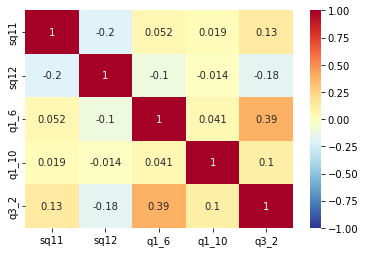

In [15]:
# 상관계수를 heatmap으로 시각화하기
sns.heatmap(df1.corr(), annot=True, cmap = 'RdYlBu_r', vmin=-1, vmax=1)
# annot=True 각 셀에 해당값을 써넣어라
# cmap = 'RdYlBu_r' 셀의 색깔 red yellow blue # vmin vmax 상관계수의 최대 최소값 설정

# 회귀분석 : 변수 간 인과관계 존재 파악
### 독립 변수 X가 종속변수 Y를 예측할 수 있는 모델을 만들 수 있나?

In [16]:
from statsmodels.formula.api import ols

In [17]:
mar_bir.groupby('q1_11').size()

q1_11
0      3
1     62
2    323
3     96
4     14
5      2
dtype: int64

In [18]:
reg1 = ols('sq11 ~ sq4', mar_bir).fit()
#r처럼 종속변수 ~ 독립변수로 입력
print(reg1.summary())
# 모형 유의미함 p= 0.00 R^= 0.039 (3.9% 설명력 가진 모형) 
# 학력수준이 높을수록 소득수준 높아진다
# 회귀식 Y= 3.65+ 0.46X + error

                            OLS Regression Results                            
Dep. Variable:                   sq11   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     21.41
Date:                Wed, 11 May 2022   Prob (F-statistic):           4.73e-06
Time:                        13:35:11   Log-Likelihood:                -1032.2
No. Observations:                 500   AIC:                             2068.
Df Residuals:                     498   BIC:                             2077.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6557      0.549      6.662      0.0

In [19]:
# 단순회귀분석: 종속변수 1개 ~ 독립변수 1개
reg2 = ols('q2_3_4 ~ q2_5', mar_bir).fit() 
print(reg2.summary())
# 모형 유의미함 p= 0.00 R^= 0.772 (77.2% 설명력 가진 모형) 
# 직장-육아병행 가능할수록 근무환경 만족도가 높아진다
# 회귀식 Y= 0.53+ 1.01X + error

                            OLS Regression Results                            
Dep. Variable:                 q2_3_4   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1689.
Date:                Wed, 11 May 2022   Prob (F-statistic):          4.08e-162
Time:                        13:35:11   Log-Likelihood:                -715.78
No. Observations:                 500   AIC:                             1436.
Df Residuals:                     498   BIC:                             1444.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5375      0.064      8.389      0.0

In [20]:
#다중회귀분석: 하나의 종속변수에 대한 다양한 독립변수 분석

m_reg1 = ols('q1_6 ~ sq11+ sq12+ q2_5', data= mar_bir).fit() 
print(m_reg1.summary())
# 모형은 유의미함 p= 0.004 R^= 0.02 (2% 설명력 가진 모형)
# 부모님의 경제수준이 낮을수록 결혼만족도 낮아진다
# 육아병행하기 좋은직장일수록 결혼만족도 높아진다
# 본인의 소득수준은 유의미한 예측변수가 아니다
# 회귀방정식 Y= 4.03+ 0.00X1 = 0.09X2 + 0.04X3 +error

                            OLS Regression Results                            
Dep. Variable:                   q1_6   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     4.383
Date:                Wed, 11 May 2022   Prob (F-statistic):            0.00466
Time:                        13:35:11   Log-Likelihood:                -549.39
No. Observations:                 500   AIC:                             1107.
Df Residuals:                     496   BIC:                             1124.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0313      0.192     21.021      0.0

In [21]:
#응답자들의 희망 자녀수
mar_bir.groupby('q1_10').size()

q1_10
0     12
1     71
2    275
3    121
4     17
5      4
dtype: int64

In [22]:
#희망 자녀수 평균
mar_bir['q1_10'].mean()

2.144

In [23]:
# 간단한 버전의 표를 출력하고 싶을 때 .tables[1]
m_reg2 = ols('q1_10 ~ q1_13_7 + q2_5 + q3_2', data= mar_bir).fit()
m_reg2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.3477,0.269,5.004,0.000,0.819,1.877
q1_13_7,0.0813,0.034,2.382,0.018,0.014,0.148
q2_5,-0.0536,0.020,-2.708,0.007,-0.092,-0.015
q3_2,0.2022,0.083,2.426,0.016,0.038,0.366


/var/folders/c2/hfgvv7gx5wn44rgqtk43khyw0000gn/T/ipykernel_14272/2889646387.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = axes3d.Axes3D(fig)


Text(0.5, 0, 'N of desired children')

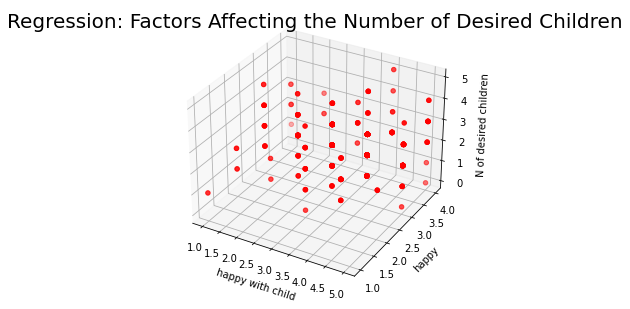

In [24]:
# scatter plot의 3차원 시각화
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
fig.suptitle('Regression: Factors Affecting the Number of Desired Children', fontsize=20)
ax = axes3d.Axes3D(fig)
ax.scatter3D(mar_bir.q1_13_7, mar_bir.q3_2, mar_bir.q1_10, c='r')
ax.set_xlabel('happy with child')
ax.set_ylabel('happy')
ax.set_zlabel('N of desired children')

In [25]:
#연습문제
m_reg3 = ols('q2_3_4 ~ q2_5 + q2_3_2 + q2_4_3', data= mar_bir).fit()
m_reg3.summary()
#p_value : 0.00 유의미함
#설명력 : 0.894, 89% 설명력
#개별 독립변수의 유효성 : 세 변수 모두 유효


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 q2_3_4   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1408.
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.68e-242
Time:                        13:35:11   Log-Likelihood:                -522.41
No. Observations:                 500   AIC:                             1053.
Df Residuals:                     496   BIC:                             1070.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1823      0.046      3.953      0.000       0.092       0.273
q2_5           0.1939      0.038      5.059      0.000       0.119       0.269
q2_3_2         0.5998      0.036     16.728      0.000       0.529       0.670
q2_4_3         0.2487      0.035      7.078      0.000       0.180       0.318
==============================================================================
Omnibus:                       26.510   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.478
Skew:                          -0.116   Prob(JB):                     1.50e-17
Kurtosis:                       4.914   Cond. No.                         7.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
mar_bir.groupby('q1_8_a').size()

q1_8_a
0     97
1    167
2    211
3     24
4      1
dtype: int64

In [36]:
mar_bir['q1_8_a']= mar_bir['q1_8_a'].replace(-1, 0) 
# 응답값이 -1 인 경우 0명으로 처리 

In [37]:
mar_bir.groupby('q1_8_a').size()

q1_8_a
0     97
1    167
2    211
3     24
4      1
dtype: int64

In [40]:
#결혼만족도: 종속변수
#독립변수: 소득수준, 부모님의 경제수준, 자녀수
m_reg1 = ols('q1_6 ~ sq11+ sq12+ q1_8_a', data= mar_bir).fit() 
print(m_reg1.summary())
# 모형은 유의미함 p= 0.00 R^= 0.031 (약 3.1% 설명력 가진 회귀모형) # 본인의 소득수준은 유의미한 예측변수가 아니다
# 부모님의 경제수준이 낮을수록 결혼만족도 낮아진다
# 자녀수가 많아질수록 결혼만족도 낮아진다
# 회귀방정식 Y= 4.19+ 0.01X1 - 0.08X2 - 0.13X3 + error

                            OLS Regression Results                            
Dep. Variable:                   q1_6   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     6.298
Date:                Wed, 11 May 2022   Prob (F-statistic):           0.000337
Time:                        13:48:23   Log-Likelihood:                -546.59
No. Observations:                 500   AIC:                             1101.
Df Residuals:                     496   BIC:                             1118.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1970      0.195     21.524      0.0

In [42]:
mar_bir.groupby('q1_10').size() #응답자들의 희망 자녀수

q1_10
0     12
1     71
2    275
3    121
4     17
5      4
dtype: int64

In [43]:
mar_bir.groupby('q2_5').size()
#직장 육아를 병행하기 좋은가(매우부정 ~ 매우긍정)

q2_5
-1    129
 1     22
 2    109
 3    167
 4     60
 5     13
dtype: int64

In [46]:
import numpy as np
mar_bir['q2_5']= mar_bir['q2_5'].replace(-1, np.nan)
#미취없자는 응답값 -1. 결측값 처리 

In [49]:
m_reg2 = ols('q1_10 ~ q1_13_7+q2_5+q3_2',data = mar_bir).fit()
print(m_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  q1_10   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     3.624
Date:                Wed, 11 May 2022   Prob (F-statistic):             0.0133
Time:                        13:51:20   Log-Likelihood:                -430.14
No. Observations:                 371   AIC:                             868.3
Df Residuals:                     367   BIC:                             883.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3227      0.323      4.091      0.0

In [57]:
m_reg2 = ols('q1_10 ~ q1_13_7 + q2_5 + q3_2', data= mar_bir).fit() 
m_reg2.summary().tables[1]
#tables[]을 통해 간단하고 깔끔하게 출력 가능, 0, 1, 2모두 출력 가능

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.3227,0.323,4.091,0.000,0.687,1.959
q1_13_7,0.0851,0.039,2.205,0.028,0.009,0.161
q2_5,-0.0453,0.045,-0.996,0.320,-0.135,0.044
q3_2,0.1978,0.094,2.110,0.036,0.013,0.382


/var/folders/c2/hfgvv7gx5wn44rgqtk43khyw0000gn/T/ipykernel_14272/812194510.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = axes3d.Axes3D(fig)


Text(0.5, 0, 'N of desired children')

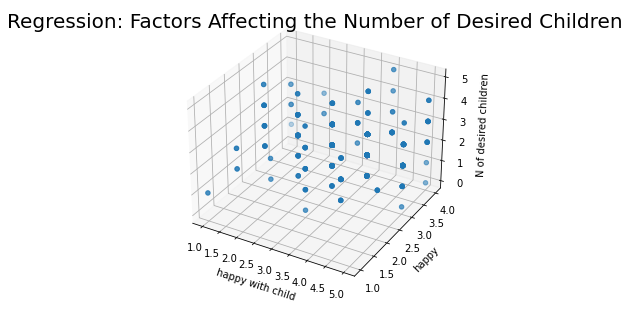

In [58]:
# scatter plot의 3차원 시각화
fig = plt.figure() # 3차원 이미지 확보
fig.suptitle('Regression: Factors Affecting the Number of Desired Children',
fontsize= 20)
ax = axes3d.Axes3D(fig)
ax.scatter3D(mar_bir.q1_13_7, mar_bir.q3_2, mar_bir.q1_10) # X, Y, Z 에 해당하는 변수 넣어주기
ax.set_xlabel('happy with child')
ax.set_ylabel('happy')
ax.set_zlabel('N of desired children')